In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import seaborn as sns
from pathlib import Path

In [2]:
cases = pd.read_csv("/project/biocomplexity/COVID-19_commons/data/NyTimes/us-counties.csv")
cases.date = pd.to_datetime(cases.date)
cases = cases[(cases.county == "Harris") & (cases.state == "Texas")]
cases = cases.pivot(index="date", columns="fips", values="cases").diff().rolling(7).mean()
cases.columns = ["cases"]
# cases

In [3]:
uncert = pd.concat(map(pd.read_csv, glob("../data/Houston_output/window_5_step_5/*/uncert.csv")))
uncert["date"] = pd.to_datetime(uncert.graph_name.apply(lambda row: row.split("_")[0]))
# uncert["end"] = pd.to_datetime(uncert.graph_name.apply(lambda row: row.split("_")[-1]))
uncert = uncert.set_index("date").drop(columns=["graph_name"])
uncert = uncert.reindex(pd.date_range(uncert.index.min(), uncert.index.max(), freq=f"{5}D"))
uncert = uncert.fillna(0)
uncert = uncert.reindex(cases.index)
uncert = uncert.fillna(method="ffill")
uncert = uncert.replace(0, np.nan)

uncert.columns = ["full_none", "full_genomes", "full_seqs", "full_genomes+seqs", "collapsed_none", "collapsed_genomes", "collapsed_seqs", "collapsed_genomes+seqs"]

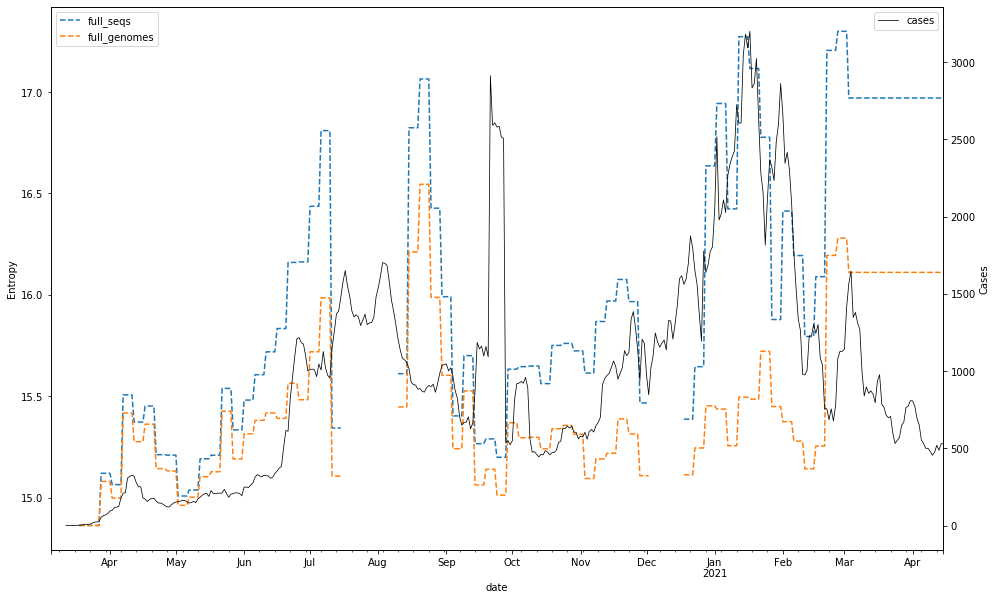

In [24]:
uncert_full = uncert[["full_seqs", "full_genomes"]]

fig, ax = plt.subplots(figsize=(16,10))

twinx = ax.twinx()

uncert_full.plot(ax=ax, linestyle="--")
cases.plot(ax=twinx, color="k", linewidth=0.75)

ax.set_ylabel("Entropy")
twinx.set_ylabel("Cases")
plt.savefig("full_seqs_houston_5_days.png")

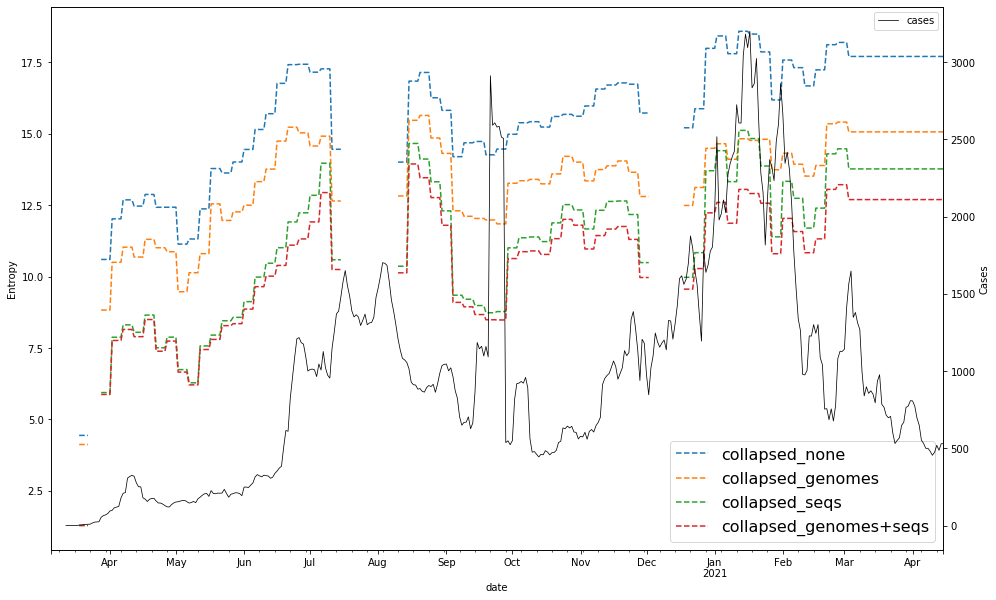

In [26]:
uncert_collapsed = uncert[[c for c in uncert.columns if "collapsed" in c]]

fig, ax = plt.subplots(figsize=(16,10))

twinx = ax.twinx()

uncert_collapsed.plot(ax=ax, linestyle="--")
cases.plot(ax=twinx, color="k", linewidth=0.75)

ax.set_ylabel("Entropy")
twinx.set_ylabel("Cases")
ax.legend(fontsize=16)
plt.savefig("collapsed_seqs_houston_5_days.png", dpi=100)